In [119]:
import pandas as pd

In [120]:
df = pd.read_csv("../../datasets/built_dataset.csv")
df.info() #Gives Information about null data and more

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737337 entries, 0 to 737336
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Item Name                    737337 non-null  object 
 1   Category Name                737337 non-null  object 
 2   Date                         737337 non-null  object 
 3   Time                         737337 non-null  object 
 4   Item Code                    737337 non-null  int64  
 5   Quantity Sold (kilo)         737337 non-null  float64
 6   Unit Selling Price (RMB/kg)  737337 non-null  float64
 7   Sale or Return               737337 non-null  object 
 8   Discount (Yes/No)            737337 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 50.6+ MB


In [121]:
df = df.drop(columns=['Item Code', 'Unit Selling Price (RMB/kg)', 'Sale or Return', 'Discount (Yes/No)', 'Date', 'Time'])

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737337 entries, 0 to 737336
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Item Name             737337 non-null  object 
 1   Category Name         737337 non-null  object 
 2   Quantity Sold (kilo)  737337 non-null  float64
dtypes: float64(1), object(2)
memory usage: 16.9+ MB


In [123]:
#Returned Items are recorded with a negative quantity value
#Getting the number of positive and negative values
(df['Quantity Sold (kilo)']>0).sum(), (df['Quantity Sold (kilo)']<0).sum()

(736947, 390)

In [124]:
#Removing the all the rows with negative quantity sold
for i in range(df.shape[0]):
    if df.at[i, 'Quantity Sold (kilo)']<0:
        df.drop(i, inplace=True)
    
df.shape

(736947, 3)

In [125]:
#Rounding the Quantity to 1 decimal place
df['Quantity Sold (kilo)'] = df['Quantity Sold (kilo)'].round(1)
df.sample()

,Item Name,Category Name,Quantity Sold (kilo)
687950,high melon,aquatic,0.4


In [126]:
#Finding the number of values that got rounded to zero
(df['Quantity Sold (kilo)'] == 0).sum()

4201

In [127]:
#Making df have only quantity values that are not zero
df = df[df['Quantity Sold (kilo)'] != 0]

In [128]:
df.shape

(732746, 3)

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\TUF\AppData\Local\Temp\ipykernel_1780\1616298376.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Quantity Sold (kilo)']) #Graph is right skewed and to observe the outliers better boxplot  can be used


<Axes: xlabel='Quantity Sold (kilo)', ylabel='Density'>

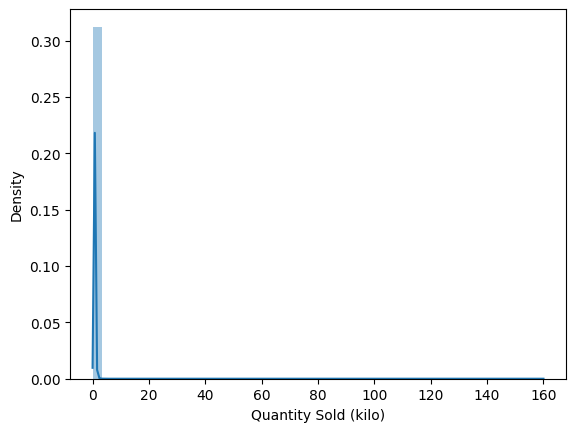

In [130]:
sns.distplot(df['Quantity Sold (kilo)']) #Graph is right skewed and to observe the outliers better boxplot  can be used

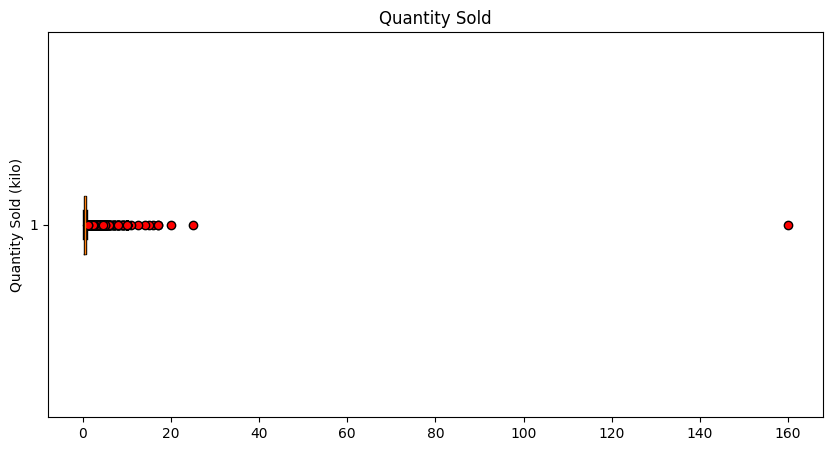

In [131]:
#Visualizing the outliers using boxplot
plt.figure(figsize=(10,5))
plt.boxplot(df['Quantity Sold (kilo)'], vert=False, flierprops=dict(markerfacecolor='Red', marker='o'))
plt.ylabel('Quantity Sold (kilo)')
plt.title('Quantity Sold')
plt.show()

In [132]:
#Mean before handling the outliers
print(df['Quantity Sold (kilo)'].mean())

0.5053033384010283


In [133]:
#Defining the limits
upper_limit = df['Quantity Sold (kilo)'].mean() + 3*df['Quantity Sold (kilo)'].std()
lower_limit = df['Quantity Sold (kilo)'].mean() - 3*df['Quantity Sold (kilo)'].std()
print('Upper limit: ',upper_limit,' lower limit: ',lower_limit)

Upper limit:  1.644818791171859  lower limit:  -0.6342121143698024


In [134]:
#Finding the outliers
df.loc[(df['Quantity Sold (kilo)'] > upper_limit) | (df['Quantity Sold (kilo)'] < lower_limit)]

,Item Name,Category Name,Quantity Sold (kilo)
1259,wawacai,flower,2.0
1403,paopaojiao,capsicum,1.8
3328,huangbaicai,flower,1.8
3843,green eggplant,solanum,2.2
4426,sweet chinese cabbage,flower,1.7
...,...,...,...
720713,net lotus root,aquatic,1.7
726186,net lotus root,aquatic,2.1
728619,net lotus root,aquatic,1.8
729799,net lotus root,aquatic,1.7


In [135]:
df_filtered = df.loc[(df['Quantity Sold (kilo)'] < upper_limit) & (df['Quantity Sold (kilo)'] > lower_limit)]

In [136]:
len(df),len(df_filtered),len(df)-len(df_filtered)

(732746, 729881, 2865)

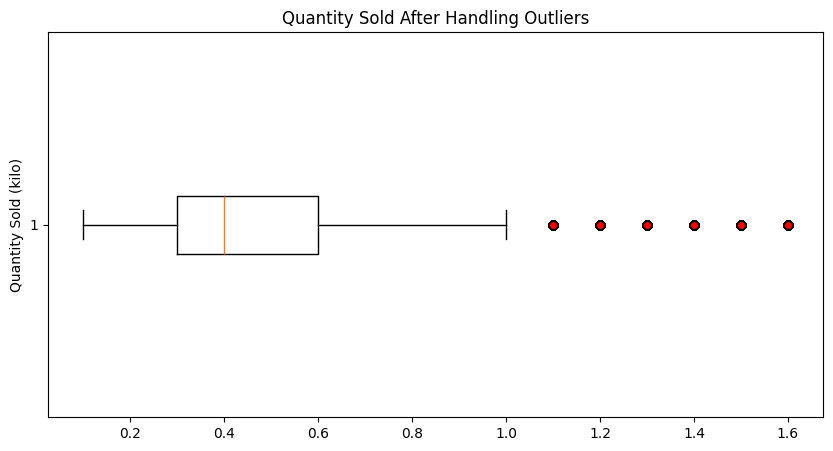

In [137]:
#After handling outliers
plt.figure(figsize=(10,5))
plt.boxplot(df_filtered['Quantity Sold (kilo)'], vert=False, flierprops=dict(markerfacecolor='Red', marker='o'))
plt.ylabel('Quantity Sold (kilo)')
plt.title('Quantity Sold After Handling Outliers')
plt.show()

In [138]:
#Further Handling Outliers
#df_filtered = df[df['Quantity Sold (kilo)'] < 1] #Removing everything above 20

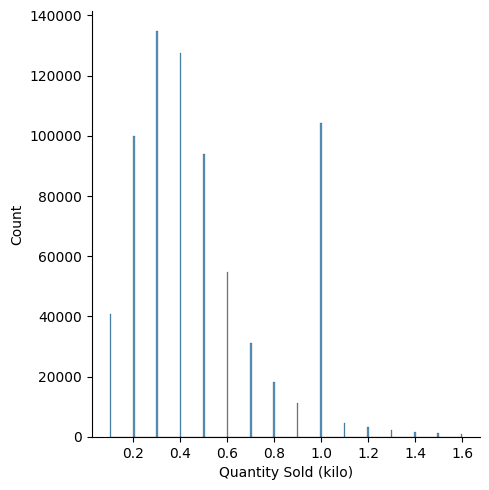

In [139]:
sns.displot(df_filtered['Quantity Sold (kilo)'])

In [140]:
print(df_filtered['Quantity Sold (kilo)'].mean()) # Mean value has only slightly changed

0.49704718988437857


In [141]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729881 entries, 0 to 737336
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Item Name             729881 non-null  object 
 1   Category Name         729881 non-null  object 
 2   Quantity Sold (kilo)  729881 non-null  float64
dtypes: float64(1), object(2)
memory usage: 22.3+ MB


In [142]:
df_final = pd.get_dummies(df_filtered) #One Hot Encoding

In [143]:
df_final.to_csv('../../datasets/annex/pre_processed_data.csv', index=False)